# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

## Perform API Calls

In [5]:
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        print("End of set. Sleeping for 60 seconds.")
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lensk
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | omboue
Processing Record 4 of Set 1 | pyapon
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | mendahara
City not found. Skipping...
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | lagoa
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | melfi
Processing Record 14 of Set 1 | mrirt
City not found. Skipping...
Processing Record 15 of Set 1 | save
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | vila franca do campo
Processing Record 21 of Set 1 | narsaq
Processing Record 22 of Set 1 | barranca

Processing Record 38 of Set 4 | comodoro rivadavia
Processing Record 39 of Set 4 | saint-philippe
Processing Record 40 of Set 4 | pangody
Processing Record 41 of Set 4 | voh
Processing Record 42 of Set 4 | cseteny
Processing Record 43 of Set 4 | bengkulu
Processing Record 44 of Set 4 | tadine
Processing Record 45 of Set 4 | gao
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | karratha
Processing Record 48 of Set 4 | new norfolk
Processing Record 49 of Set 4 | tiksi
Processing Record 0 of Set 5 | cabo san lucas
Processing Record 1 of Set 5 | ciechanow
Processing Record 2 of Set 5 | arlit
Processing Record 3 of Set 5 | saint-augustin
Processing Record 4 of Set 5 | cabatuan
Processing Record 5 of Set 5 | shchelyayur
City not found. Skipping...
Processing Record 6 of Set 5 | abu dhabi
Processing Record 7 of Set 5 | mutsamudu
City not found. Skipping...
Processing Record 8 of Set 5 | dingle
Processing Record 9 of Set 5 | isangel
Processing Record 10 of Set 5 | sisimiut

Processing Record 26 of Set 8 | porangatu
Processing Record 27 of Set 8 | arraial do cabo
Processing Record 28 of Set 8 | guaranda
Processing Record 29 of Set 8 | geraldton
Processing Record 30 of Set 8 | tobermory
Processing Record 31 of Set 8 | la union
Processing Record 32 of Set 8 | sioux lookout
Processing Record 33 of Set 8 | lorengau
Processing Record 34 of Set 8 | ixtapa
Processing Record 35 of Set 8 | hami
Processing Record 36 of Set 8 | mogadishu
Processing Record 37 of Set 8 | townsville
Processing Record 38 of Set 8 | khor
Processing Record 39 of Set 8 | fort nelson
Processing Record 40 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 41 of Set 8 | sambava
Processing Record 42 of Set 8 | alice springs
Processing Record 43 of Set 8 | amuntai
Processing Record 44 of Set 8 | oranjemund
Processing Record 45 of Set 8 | kawalu
Processing Record 46 of Set 8 | saleaula
City not found. Skipping...
Processing Record 47 of Set 8 | yumen
Processing Record 48 of Set 8 |

Processing Record 11 of Set 12 | perth
Processing Record 12 of Set 12 | labuhan
Processing Record 13 of Set 12 | matara
Processing Record 14 of Set 12 | lichuan
Processing Record 15 of Set 12 | extremoz
Processing Record 16 of Set 12 | otradnoye
Processing Record 17 of Set 12 | varadero
Processing Record 18 of Set 12 | aksu
Processing Record 19 of Set 12 | atambua
Processing Record 20 of Set 12 | ahwa
Processing Record 21 of Set 12 | huntington
Processing Record 22 of Set 12 | parrita
Processing Record 23 of Set 12 | kolokani
Processing Record 24 of Set 12 | soldotna
Processing Record 25 of Set 12 | vao
Processing Record 26 of Set 12 | marquette
Processing Record 27 of Set 12 | almeirim
Processing Record 28 of Set 12 | pangkalanbuun
Processing Record 29 of Set 12 | puerto suarez
Processing Record 30 of Set 12 | nome
Processing Record 31 of Set 12 | tapaua
City not found. Skipping...
Processing Record 32 of Set 12 | praia da vitoria
Processing Record 33 of Set 12 | maragogi
Processing R

In [6]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [7]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lensk,60.73,114.93,74.48,53,100,2.08,RU,1593607131
1,jamestown,42.10,-79.24,69.01,88,75,6.93,US,1593606990
2,omboue,-1.57,9.26,77.65,73,100,10.65,GA,1593607131
3,pyapon,16.28,95.68,80.02,84,100,11.86,MM,1593607131
4,port alfred,-33.59,26.89,80.01,28,0,5.99,ZA,1593607132


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.610071,20.465752,70.418496,68.369912,52.382301,8.099912,1.593607e+09
std,33.336136,90.893741,15.577669,22.578378,38.169959,5.374499,6.251006e+01
min,-54.800000,-179.170000,23.000000,6.000000,0.000000,0.470000,1.593607e+09
25%,-8.900000,-57.770000,61.000000,55.000000,13.000000,4.410000,1.593607e+09
50%,22.290000,22.020000,73.180000,74.000000,57.000000,7.020000,1.593607e+09
75%,46.680000,105.290000,79.970000,86.000000,90.000000,10.870000,1.593607e+09
max,78.220000,179.320000,114.890000,100.000000,100.000000,42.500000,1.593607e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lensk,60.73,114.93,74.48,53,100,2.08,RU,1593607131
1,jamestown,42.10,-79.24,69.01,88,75,6.93,US,1593606990
2,omboue,-1.57,9.26,77.65,73,100,10.65,GA,1593607131
3,pyapon,16.28,95.68,80.02,84,100,11.86,MM,1593607131
4,port alfred,-33.59,26.89,80.01,28,0,5.99,ZA,1593607132


In [11]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Latitude vs. Temperature Plot

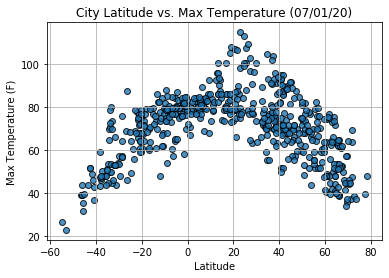

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

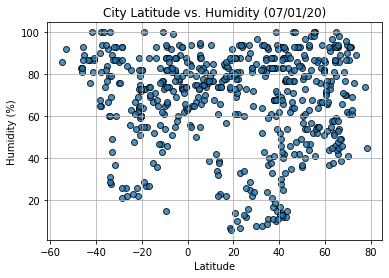

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

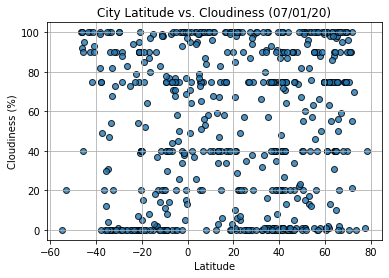

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

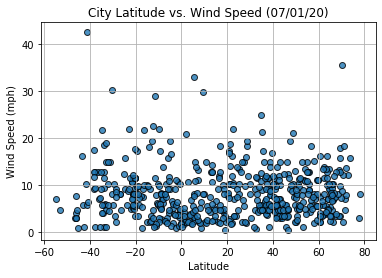

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [16]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

###  Max Temp vs. Latitude Linear Regression

The r-value is: 0.4385222622143718


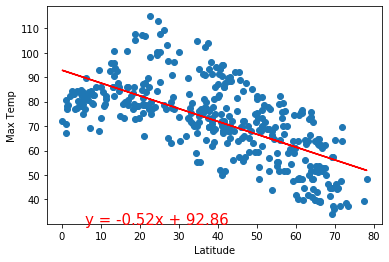

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-value is: 0.6199397603726745


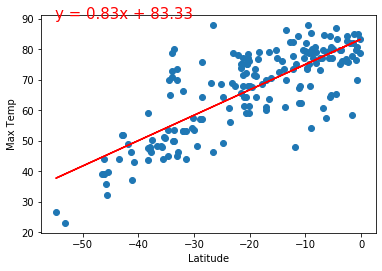

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

The high r value indicates a strong positive correlation between latitude and max temperature. R values ~ 0.5 indicate that there is a moderate positive correlation. 

### Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0016116777278289516


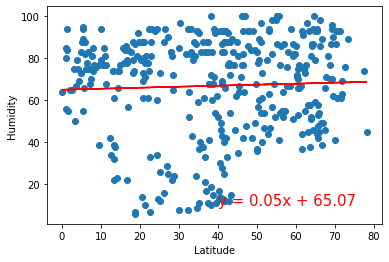

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-value is: 0.0038626940821578


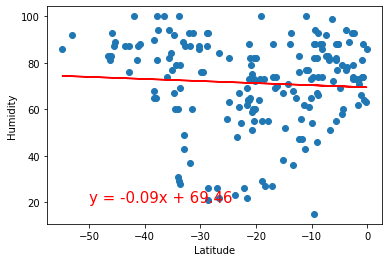

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 2.5990039670556435e-05


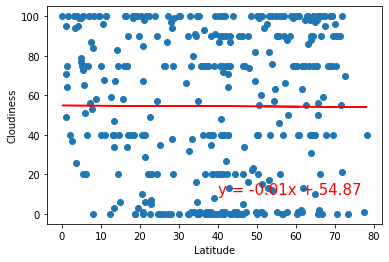

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-value is: 0.009647394310294634


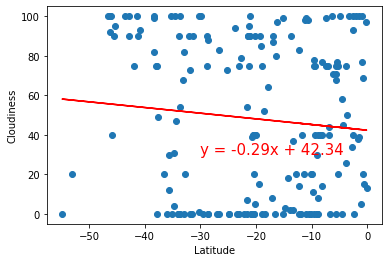

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.005590882726654447


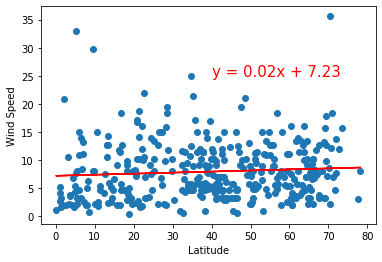

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-value is: 0.015078836518603362


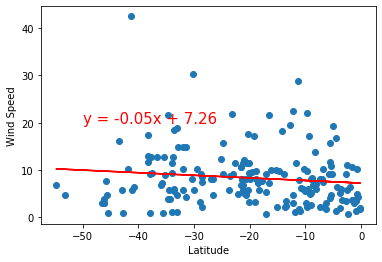

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.